In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def image_resize(frame, width=1080, height=720):
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation=cv2.INTER_AREA)

In [3]:
def disp(image):
    cv2.imshow("image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
image1 = cv2.imread("images/modi.jpg")
image2 = image_resize(image1)
disp(image1)
disp(image2)

In [5]:
blank_image = np.zeros((500, 500, 3), dtype=np.uint8)
disp(blank_image)
cv2.rectangle(blank_image, (0, 0), (100, 200), (0, 0, 255))
disp(blank_image)
cv2.circle(
    blank_image, center=(250, 250), radius=100, color=(0, 255, 0)
)  # (image,co-ordinates,radius,color)
disp(blank_image)
cv2.line(
    blank_image,
    pt1=(0, 0),
    pt2=(250, 250),
    color=(255, 0, 0),
)
disp(blank_image)
cv2.putText(
    img=blank_image,
    text="Hello world",
    org=(450, 450),
    fontFace=cv2.FONT_HERSHEY_COMPLEX,
    fontScale=0.50,
    color=(0, 0, 255),
)
disp(blank_image)

In [6]:
img = cv2.imread("images/bull.jpg")
disp(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
disp(gray_img)
blur_img = cv2.GaussianBlur(
    src=img, ksize=(7, 7), sigmaX=cv2.BORDER_DEFAULT
)  # bigger the kernal size more the blur
disp(blur_img)
canny = cv2.Canny(img, 100, 100)
disp(canny)

In [7]:
def translate(image, x, y):
    transMat = np.float32([[1, 0, x], [0, 1, y]])  # type:ignore
    dim = (image.shape[1], image.shape[0])
    return cv2.warpAffine(img, transMat, dim)  # type: ignore

In [8]:
def rotate(image, angle, rotpoint=None):
    (height, width) = image.shape[:2]
    if rotpoint is None:
        rotpoint = (width // 2, height // 2)
    rotMatix = cv2.getRotationMatrix2D(center=rotpoint, angle=angle, scale=1.0)
    dim = (width, height)
    return cv2.warpAffine(image, rotMatix, dim)

In [9]:
img = cv2.imread("images/bull.jpg")
translated = translate(img, 50, 50)
rotated = rotate(img, 45)
disp(translated)
disp(rotated)

In [11]:
img = cv2.imread("images/bull.jpg")
blank = np.zeros(img.shape[:2], dtype=np.uint8)
mask = cv2.circle(
    img=blank,
    center=(blank.shape[1] // 2, blank.shape[0] // 2),
    radius=200,
    color=(255, 255, 255),
    thickness=-1,
)
masked = cv2.bitwise_and(src1=img, src2=img, mask=mask)
disp(masked)

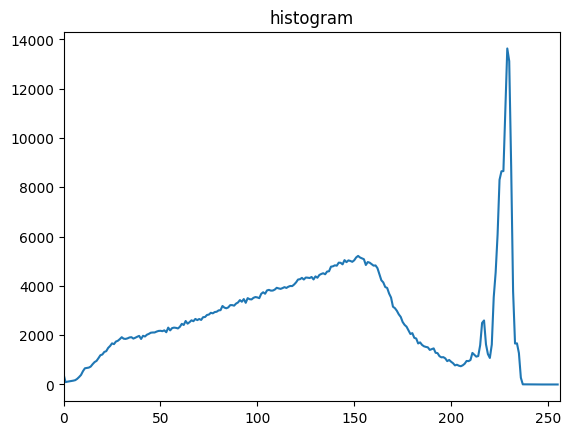

In [12]:
img = cv2.imread("images/bull.jpg", 0)
hist = cv2.calcHist(
    images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 256]
)
plt.figure()
plt.title("histogram")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
disp(img)

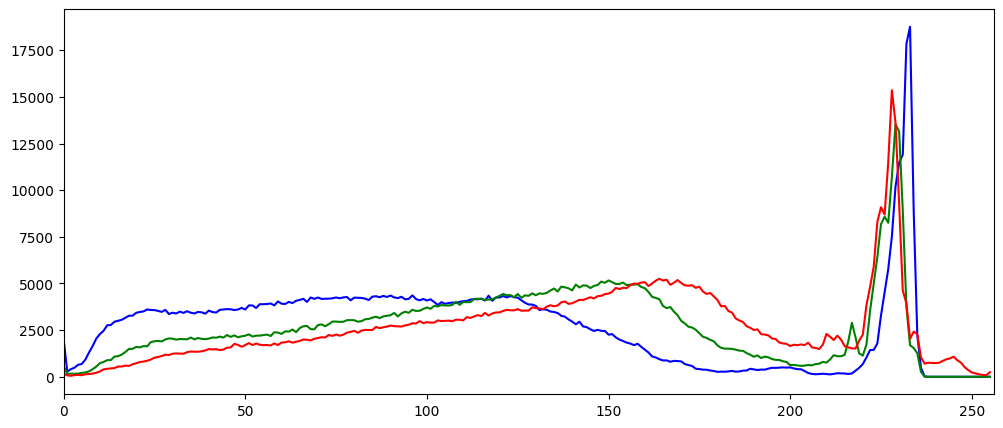

In [15]:
img = cv2.imread("images/bull.jpg")
colour = ["b", "g", "r"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(colour):
    hist = cv2.calcHist(
        images=[img], channels=[i], mask=None, histSize=[256], ranges=[0, 256]
    )
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()